In [2]:
from univariate_tools import *

In [24]:
x_data = np.linspace(-10,10,1000)

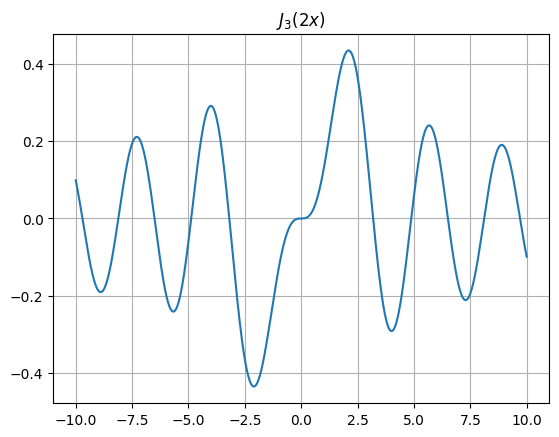

In [26]:
model = FunctionalModel(parameters = ["a","b"],variables =["x"],equation="a*besselj(3,b*x)")
model.set_parameters({"a":1,"b":2})
plt.plot(x_data,model(x_data))
plt.title(f"${model.to_latex()}$")
plt.grid()

In [4]:
bd = model.d(order=2)

In [5]:
bd.equation

a*b*(-b*(besselj(1, b*x)/2 - besselj(3, b*x)/2)/2 - b*besselj(1, b*x)/2)

In [6]:
sin = FunctionalModel(parameters = "phi A omega f lamda",variables="t x",equation = "A*sin(2*pi*f*t+2*pi/lamda*x+phi)")

In [7]:
sin.equation

A*sin(2*pi*f*t + phi + 2*pi*x/lamda)

In [8]:
sin_squared = sin**2

In [9]:
sin_squared.equation

A**2*sin(2*pi*f*t + phi + 2*pi*x/lamda)**2

In [10]:
d_sin_squared=sin_squared.d(respect_to="x")

In [11]:
d_sin_squared.equation

4*pi*A**2*sin(2*pi*f*t + phi + 2*pi*x/lamda)*cos(2*pi*f*t + phi + 2*pi*x/lamda)/lamda

In [12]:
model = FunctionalModel(parameters = "a", variables="x",equation="a*x**2/(x+1)")

In [17]:
im =model.integrate(order=3)

In [18]:
im.equation

a*x**4/24 - a*x**3/6 - 3*a*x**2/4 - a*x/2 + a*log(x + 1)/2 + (a*x**2/2 + a*x)*log(x + 1)

In [15]:
model.equation

a*x**2/(x + 1)

In [3]:
model = FunctionalModel(parameters=["a","b","c"],variables="x",equation="a*x**2+b*x+c")
model.set_parameters({"a":1.25,"b":3,"c":-.4})
x_data = np.linspace(-10,10,1000)
y_data = model(x_data)

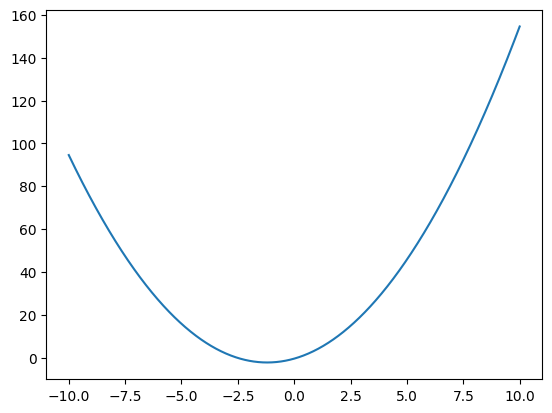

In [4]:
plt.plot(x_data,y_data)

In [5]:
x_data = np.linspace(-10,10,1000)
y_data = 2.12*x_data+3.11
model = FunctionalModel(parameters=["m","b"],variables="x",equation="m*x+b")
model.fit_data(x_data = x_data,y_data = y_data,initial_guess = {"m":2,"b":3})


In [6]:
model.parameter_values


{'m': 2.12, 'b': 3.11}

In [8]:
simulated_data = DataSimulator(**{"parameters":["m","b"],
                   "variables":"x",
                   "equation":"m*x+b",
                   "parameter_values":{"m":2,"b":1},
                   "output_noise_type":"normal",
                   "output_noise_width":1,
                   "output_noise_center":0,
                   "output_noise_amplitude":1.,
                   "random_seed":42,
                   "x":np.linspace(-10,10,100)})

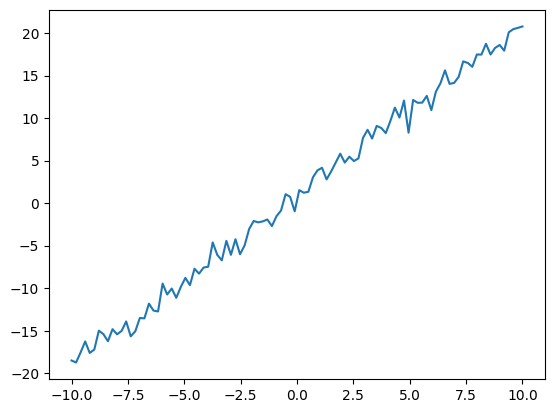

In [9]:
plt.plot(simulated_data.x,simulated_data.data)

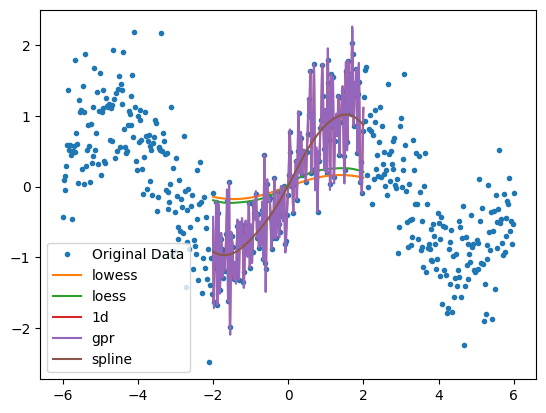

In [10]:
test_interpolate_data()

lowess:[-1.50119931 -1.10244141 -0.7172726  -0.32767806  0.05667201  0.45055378
  0.84191562  1.23661692  1.63492382  2.02089461],[-2.         -1.22222222 -0.44444444  0.33333333  1.11111111  1.88888889
  2.66666667  3.44444444  4.22222222  5.        ]
loess:[-1.49340971 -1.10434915 -0.71514757 -0.32582283  0.06360595  0.45216525
  0.83936566  1.22570993  1.6117469   1.99876348],[-2.         -1.22222222 -0.44444444  0.33333333  1.11111111  1.88888889
  2.66666667  3.44444444  4.22222222  5.        ]
1d:[-1.42636307 -1.13106478 -0.66659649 -0.4869886   0.00831115  0.38605485
  0.93047397  1.16397765  1.6343476   2.12158315],[-2.         -1.22222222 -0.44444444  0.33333333  1.11111111  1.88888889
  2.66666667  3.44444444  4.22222222  5.        ]
gpr:[-4.20444075e-01 -2.49338714e-01 -3.03783832e-01 -5.16334599e-01
  1.22409794e-02 -1.27011983e-05  9.03801294e-01  1.16796712e+00
  3.93167986e-02  2.29060823e+00],[-2.         -1.22222222 -0.44444444  0.33333333  1.11111111  1.88888889
  2.6

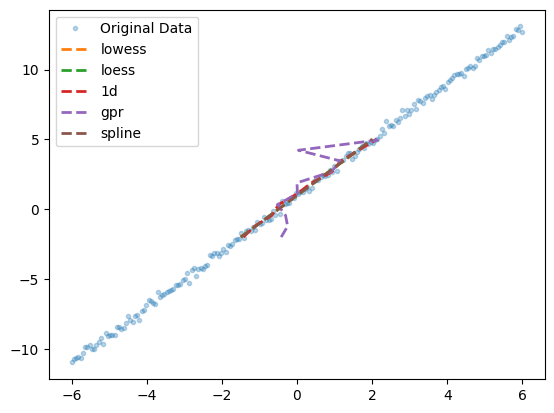

In [11]:
test_reverse_regressor()

Text(0.5, 1.0, '$\\alpha e^{- \\frac{\\left(x - x_{0}\\right)^{2}}{2 \\delta^{2}}} + b + m x$')

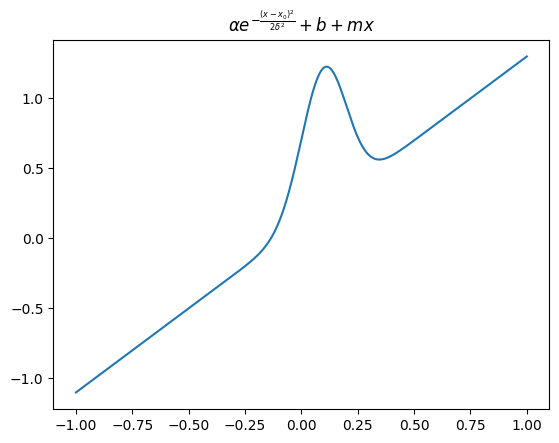

In [12]:
from univariate_tools import *
# lets make a composite function
line=FunctionalModel(parameters=["m","b"],variables="x",equation="m*x+b")
gaussian=FunctionalModel(parameters="alpha x0 delta",variables="x",equation="alpha*exp(-1*(x-x0)^2/(2*delta**2))")
gauss_line=line+gaussian
x_data=np.linspace(-1,1,1000)
plt.plot(x_data,gauss_line(alpha=1,x0=.1,delta=.1,m=1.2,b=.1,x=x_data))
plt.title("${0}$".format(gauss_line.to_latex()))